<a href="https://colab.research.google.com/github/mirellagarcia/chat/blob/main/python_mi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
#bibliotca para formatar data.

import numpy as np
import datetime
#
from collections import Counter
#
import collections
#
import pandas as pd
#
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Leitura e interpretação de arquivo

ref_arquivo = open('GrupoBI.txt', "r", encoding='utf-8')
linha = ref_arquivo.readline()

list_datas = []
list_erros_formatacao = []
list_pessoas = []
list_msgs = []

while linha:
    linha = ref_arquivo.readline()
    try:
      date_time_obj = datetime.datetime.strptime(linha[1:17], '%d/%m/%y %H:%M:%S')
      list_datas.append(date_time_obj)
      msg = linha[20:]
      if(len(msg.split(':')) >= 2):
            list_pessoas.append(msg.split(':')[0])
            list_msgs.append(msg.split(':')[1])
    except ValueError:
      list_erros_formatacao.append('Falha na formatação')
ref_arquivo.close()

           Pessoa  Qnt Mensagem
2            Jean            72
3       Alexandre           117
7           Lopes           127
6  Igor Goncalves           174
4         Mirella           242
1          Laisla           322
0          Rosane           379
5          Andrey           688
Quem mais fala no grupo é o participante Andrey


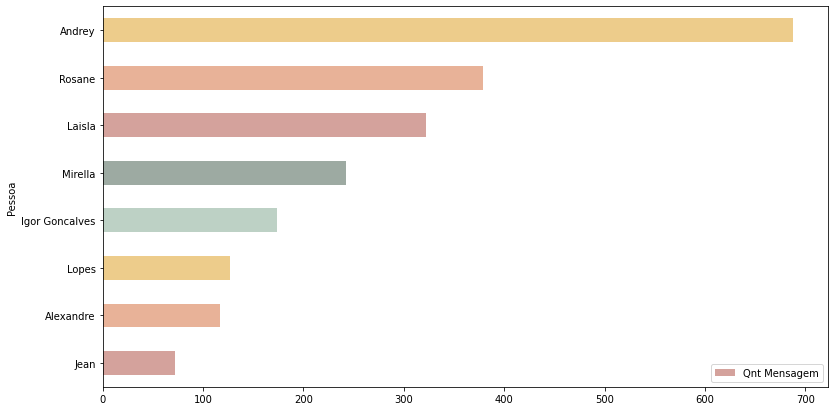

In [21]:
#Rename dos contatos + Quem mais fala no Grupo - Bonus

dict_pessoas = dict(Counter(list_pessoas))
pessoas_df = pd.DataFrame(dict_pessoas.items(), columns=['Pessoa', 'Qnt Mensagem'])
pessoas_df = pessoas_df.sort_values(by=['Qnt Mensagem'])
pessoas_df['Pessoa'] = pessoas_df['Pessoa'].replace(['\u202a+55\xa011\xa095765‑5550\u202c','\u202a+55\xa081\xa09957‑6999\u202c','\u202a+55\xa011\xa098793‑6843\u202c','\u202a+55\xa011\xa097301‑7387\u202c','\u202a+55\xa013\xa099785‑0435\u202c','\u202a+55\xa011\xa095980‑8745\u202c','\u202a+55\xa011\xa099122‑8956\u202c'],['Andrey','Rosane','Laisla','Mirella','Lopes','Alexandre','Jean'])
print(pessoas_df)
pessoas_df.plot(kind='barh', x = 'Pessoa', y = 'Qnt Mensagem', figsize=(13,7), color=['#D4A29C', '#E8B298', '#EDCC8B', '#BDD1C5', '#9DAAA2'])

#Quem mais fala no Grupo - Bonus
print('Quem mais fala no grupo é o participante Andrey')

Palavras mais utilizadas : {'que': 281, 'de': 272, 'não': 194}
A palavra que mais se repete é *QUE*


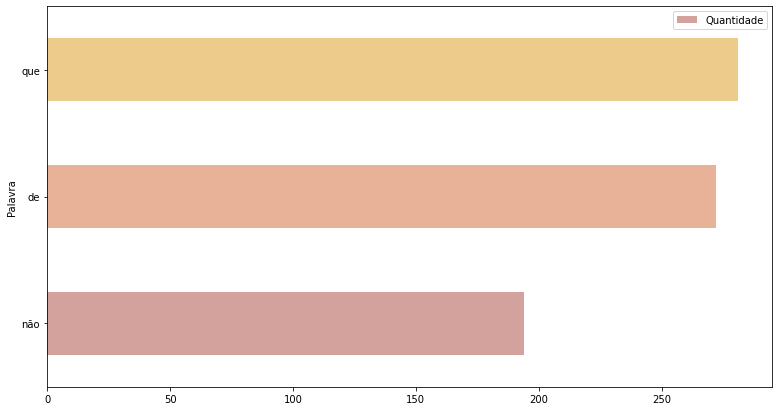

In [20]:
#Encontrando palavras repetidas

palavras = []
f = list_msgs
for i in f:
  i = i.split()
  for a in i:
    palavras.append(a)
    if len(a) < 2:
     palavras.remove(a)
dict_palavras = dict(Counter(palavras).most_common(3))
print('Palavras mais utilizadas :', dict_palavras)

palavras_df = pd.DataFrame(dict_palavras.items(), columns=['Palavra', 'Quantidade'])
palavras_df = palavras_df.sort_values(by=['Quantidade'])
palavras_df.plot(kind='barh', x = 'Palavra', y = 'Quantidade', figsize=(13,7), color=['#D4A29C', '#E8B298', '#EDCC8B', '#BDD1C5', '#9DAAA2'])

#Quais as palavras mais trocadas na conversa - Resposta 1
print('A palavra que mais se repete é *QUE*')

O dia da semana que possui mais troca de mensagem é Quarta-feira


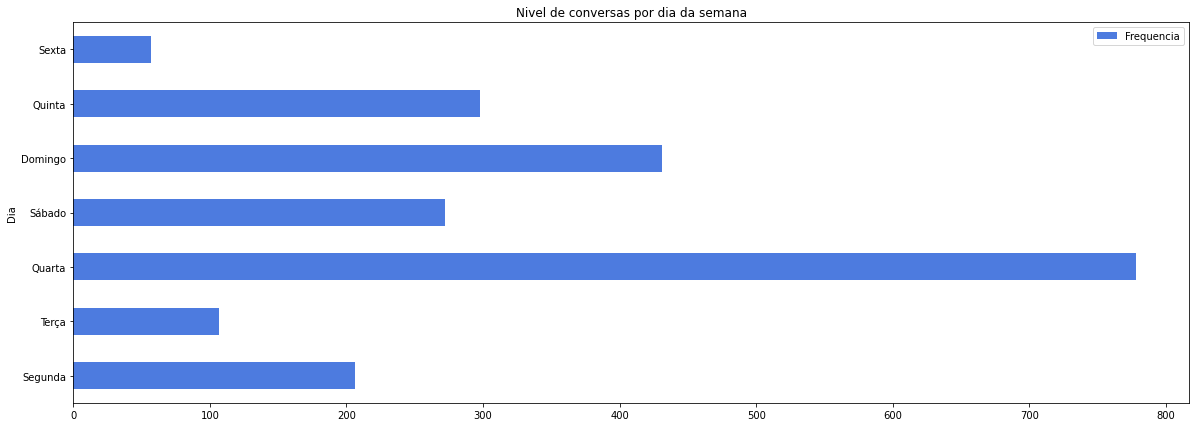

In [18]:
#Definindo semana

dia_da_semana = {
  0: "Domingo",
  1: "Segunda",
  2: "Terça",
  3: "Quarta",
  4: "Quinta",
  5: "Sexta",
  6: "Sábado"
}
list_horas = []
list_dia_semana = []
for data in list_datas:
    list_horas.append(data.time().hour) 
    list_dia_semana.append(dia_da_semana.get(data.weekday()))
    
dict_dia_semana = dict(Counter(list_dia_semana))

semana_df = pd.DataFrame(dict_dia_semana.items(), columns=['Dia', 'Frequencia'])
semana_df.plot(kind='barh', x = 'Dia', y='Frequencia', title='Nivel de conversas por dia da semana', figsize=(20,7), color=['#4D7BDF'])

#Qual o dia da semana que mais troca mensagem - Resposta 2
print('O dia da semana que possui mais troca de mensagem é Quarta-feira')

O horario que mais mensagens são trocadas é o de 19h
O horario que menos mensagens são trocadas é o de 06h


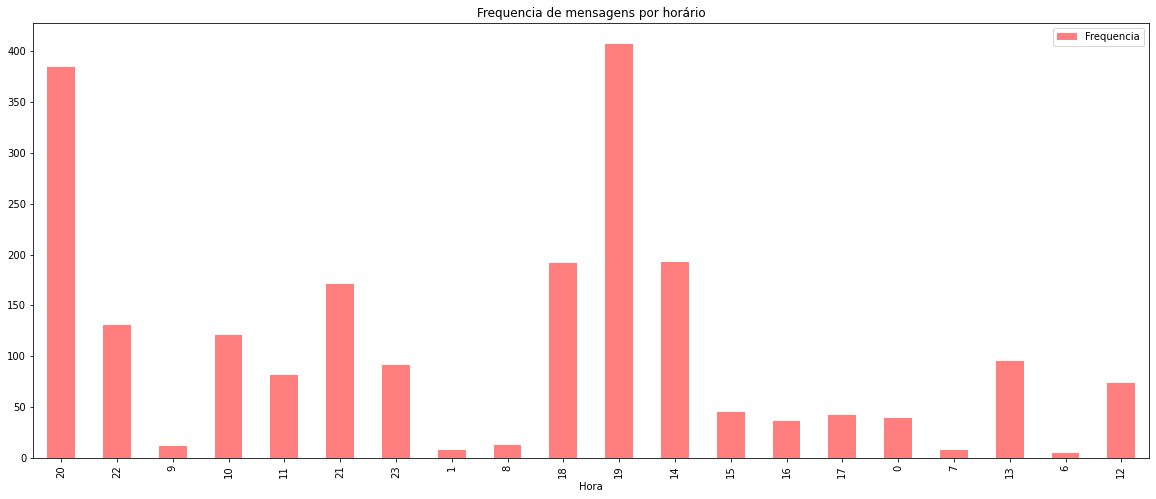

In [19]:
#Horarios de movimento

dict_horas = dict(Counter(list_horas))

horas_df = pd.DataFrame(dict_horas.items(), columns=['Hora', 'Frequencia'])
horas_df.plot(kind='bar', x = 'Hora', y='Frequencia', title='Frequencia de mensagens por horário',figsize=(20,8), color=['#FF7F7F'])

#Qual o horario que mais fala - Resposta 3
print('O horario que mais mensagens são trocadas é o de 19h')

#Qual o horario que menos fala - Resposta 4
print('O horario que menos mensagens são trocadas é o de 06h')